### Exercícios Aula 6

Faça a leitura do arquivo movies.csv
column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross', 'movie_title', 'num_user_for_reviews', 'country', 'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme.
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
movies = pd.read_csv('../dados/movies.csv', header=None,
                     names=['color',
                            'director_name', 'num_critic_for_reviews', 'duration', 'gross',
                            'movie_title', 'num_user_for_reviews', 'country', 'cotent_rating',
                            'budget', 'title_year', 'imdb_score', 'genre'], delimiter='|')

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   100 non-null    object 
 1   director_name           100 non-null    object 
 2   num_critic_for_reviews  100 non-null    object 
 3   duration                100 non-null    object 
 4   gross                   100 non-null    object 
 5   movie_title             100 non-null    object 
 6   num_user_for_reviews    100 non-null    object 
 7   country                 100 non-null    object 
 8   cotent_rating           100 non-null    object 
 9   budget                  100 non-null    object 
 10  title_year              100 non-null    object 
 11  imdb_score              100 non-null    float64
 12  genre                   100 non-null    object 
dtypes: float64(1), object(12)
memory usage: 10.3+ KB


In [11]:
movies['budget'] = movies['budget'].str.replace(',', '')

In [12]:
movies[['gross', 'budget', 'title_year']] = movies[['gross', 'budget', 'title_year']].replace('?', np.nan)

In [13]:
movies['profit'] = movies['gross'].astype(float) - movies['budget'].astype(float)

In [25]:
movies[['gross', 'budget']] = movies[['gross', 'budget']].astype(float).fillna(0).astype(int)
movies['title_year'] = movies['title_year'].astype(float).fillna(0).astype(int)
movies['profit'] = movies['gross'].astype(float) - movies['budget'].astype(float)

In [38]:
# 1 

print(movies.iloc[movies['profit'].idxmax()])

color                             Color
director_name             James Cameron
num_critic_for_reviews            723.0
duration                          178.0
gross                         760505847
movie_title                     Avatar 
num_user_for_reviews             3054.0
country                             USA
cotent_rating                     PG-13
budget                        237000000
title_year                         2009
imdb_score                          7.9
genre                            Action
profit                      523505847.0
Name: 0, dtype: object


In [39]:
# 2

print(movies.iloc[movies['profit'].idxmin()])

color                              Color
director_name             Andrew Stanton
num_critic_for_reviews             462.0
duration                           132.0
gross                           73058679
movie_title                 John Carter 
num_user_for_reviews               738.0
country                              USA
cotent_rating                      PG-13
budget                         263700000
title_year                          2012
imdb_score                           6.6
genre                             Action
profit                      -190641321.0
Name: 5, dtype: object


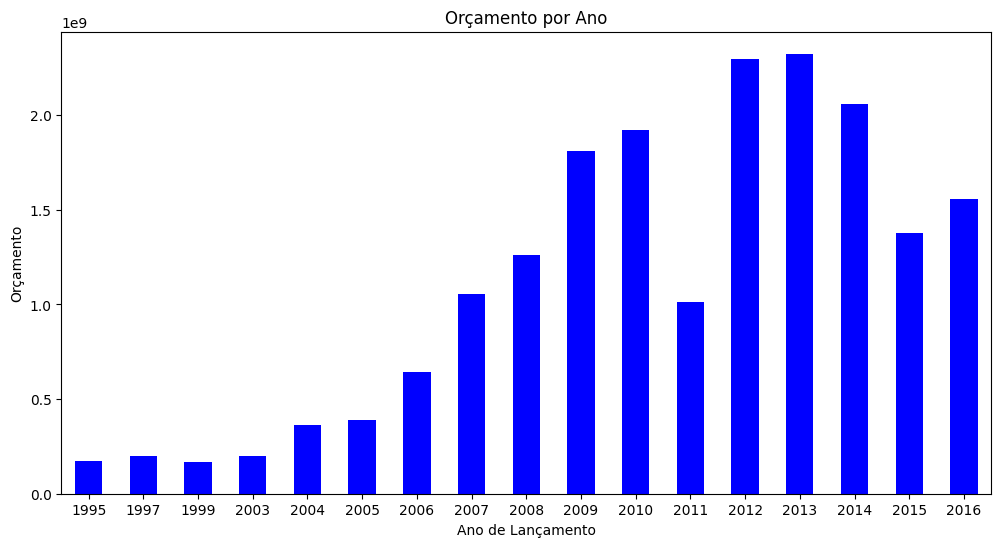

In [43]:
# 3

budget_per_year = movies.groupby('title_year')['budget'].sum()

budget_per_year = budget_per_year.iloc[1:]

# budget_per_year

plt.figure(figsize=(12, 6))
budget_per_year.plot(kind='bar', color='blue')
plt.title('Orçamento por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Orçamento')
plt.xticks(rotation=0)
plt.show()

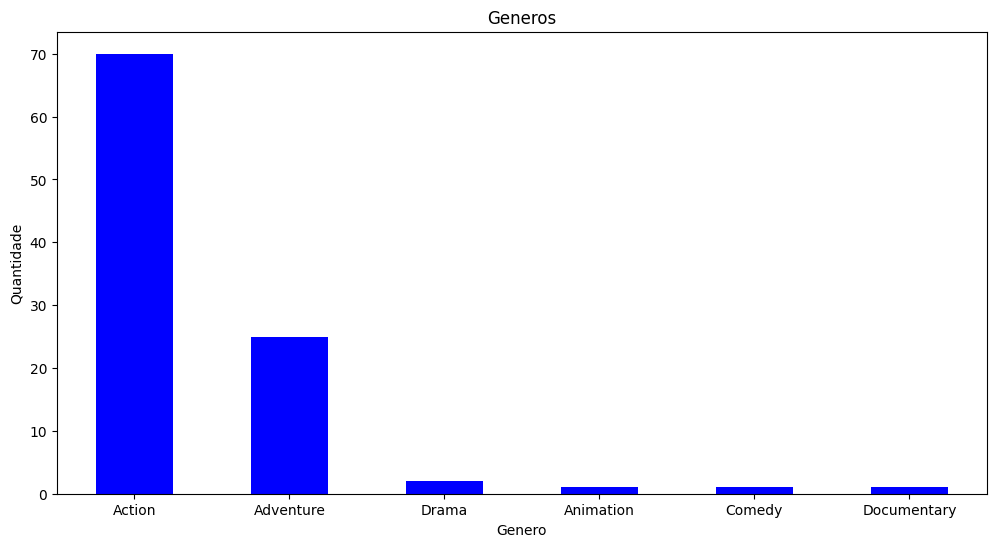

In [44]:
# 4

# movies.value_counts('genre')

plt.figure(figsize=(12, 6))
movies.value_counts('genre').plot(kind='bar', color='blue')
plt.title('Generos')
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


In [60]:
# 5 - infelizmente já vi a maioria pra servir de sugestão hehehe

movies.nlargest(10, columns='imdb_score')

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,profit
66,Color,Christopher Nolan,645.0,152.0,533316061,The Dark Knight,4667.0,USA,PG-13,185000000,2008,9.0,Action,348316061.0
97,Color,Christopher Nolan,642.0,148.0,292568851,Inception,2803.0,USA,PG-13,160000000,2010,8.8,Action,132568851.0
96,Color,Christopher Nolan,712.0,169.0,187991439,Interstellar,2725.0,USA,PG-13,165000000,2014,8.6,Adventure,22991439.0
3,Color,Christopher Nolan,813.0,164.0,448130642,The Dark Knight Rises,2701.0,USA,PG-13,250000000,2012,8.5,Action,198130642.0
58,Color,Andrew Stanton,421.0,98.0,223806889,WALL·E,1043.0,USA,G,180000000,2008,8.4,Adventure,43806889.0
43,Color,Lee Unkrich,453.0,103.0,414984497,Toy Story 3,733.0,USA,G,200000000,2010,8.3,Adventure,214984497.0
67,Color,Pete Docter,408.0,96.0,292979556,Up,704.0,USA,PG,175000000,2009,8.3,Adventure,117979556.0
78,Color,Pete Docter,536.0,95.0,356454367,Inside Out,773.0,USA,PG,175000000,2015,8.3,Adventure,181454367.0
27,Color,Anthony Russo,516.0,147.0,407197282,Captain America: Civil War,1022.0,USA,PG-13,250000000,2016,8.2,Action,157197282.0
93,Color,Dean DeBlois,288.0,98.0,217387997,How to Train Your Dragon,492.0,USA,PG,165000000,2010,8.2,Adventure,52387997.0


In [53]:
movies

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,profit
0,Color,James Cameron,723.0,178.0,760505847,Avatar,3054.0,USA,PG-13,237000000,2009,7.9,Action,523505847.0
1,Color,Gore Verbinski,302.0,169.0,309404152,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,300000000,2007,7.1,Action,9404152.0
2,Color,Sam Mendes,602.0,148.0,200074175,Spectre,994.0,UK,PG-13,245000000,2015,6.8,Action,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,448130642,The Dark Knight Rises,2701.0,USA,PG-13,250000000,2012,8.5,Action,198130642.0
4,?,Doug Walker,?,?,0,Star Wars: Episode VII - The Force Awakens ...,?,?,?,0,0,7.1,Documentary,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Color,James Gunn,653.0,121.0,333130696,Guardians of the Galaxy,1097.0,USA,PG-13,170000000,2014,8.1,Action,163130696.0
96,Color,Christopher Nolan,712.0,169.0,187991439,Interstellar,2725.0,USA,PG-13,165000000,2014,8.6,Adventure,22991439.0
97,Color,Christopher Nolan,642.0,148.0,292568851,Inception,2803.0,USA,PG-13,160000000,2010,8.8,Action,132568851.0
98,Color,Hideaki Anno,1.0,120.0,0,Godzilla Resurgence,13.0,Japan,?,0,2016,8.2,Action,0.0
